#  BANK MARKETING DATASET

 [URL FOR DATASET](https://archive.ics.uci.edu/dataset/222/bank+marketing)

# DOWNLOADING DATASET


In [ ]:
!wget "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"


--2023-10-02 10:14:09--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [   <=>              ] 999.85K  2.34MB/s    in 0.4s    

2023-10-02 10:14:10 (2.34 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [ ]:
#Unzip the zip files
!unzip "bank+marketing.zip"
!unzip "bank-additional.zip"

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score



# CLEANING THE DATASET


In [ ]:
#load data  to dataframe
df1 = pd.DataFrame(pd.read_csv("bank-additional/bank-additional-full.csv",sep=';'))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# All unique values in a cloumn
for col in df1.columns:
  print( "Column Name : -", col ,df1[col].unique())
  print(20*'------')



Column Name : - age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------------------------------------------------------------------------------------------------
Column Name : - job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------------------------------------------------------------------------------------
Column Name : - marital ['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------------------------------------------------------------------
Column Name : - education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
-

In [ ]:
# Number of Missing values in each Column
print(" Missing Values Count ")
for col in df1.columns:
  print(col,"  ---> ",df1[df1[col] == 'unknown'][col].count())
  print(20*'-----')



 Missing Values Count 
age   --->  0
----------------------------------------------------------------------------------------------------
job   --->  330
----------------------------------------------------------------------------------------------------
marital   --->  80
----------------------------------------------------------------------------------------------------
education   --->  1731
----------------------------------------------------------------------------------------------------
default   --->  8597
----------------------------------------------------------------------------------------------------
housing   --->  990
----------------------------------------------------------------------------------------------------
loan   --->  990
----------------------------------------------------------------------------------------------------
contact   --->  0
----------------------------------------------------------------------------------------------------
month   --->  0
-----

In [ ]:
# Drop the instances with missing values

df1 = df1[df1['job'] != 'unknown']
df1 = df1[df1['marital'] != 'unknown']
df1 = df1[df1['loan'] != 'unknown']
df1 = df1[df1['housing'] != 'unknown']
df1 = df1[df1['education'] != 'unknown']
df1 = df1[df1['default'] != 'unknown']

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

# OUTLIER DETECTION AND REMOVAL

In [ ]:
# Change Name of columns to Proper Format

df1.rename(columns={'emp.var.rate': 'emp_var_rate'}, inplace=True)
df1.rename(columns={'cons.price.idx': 'cons_price_idx'}, inplace=True)
df1.rename(columns={'nr.employed': 'nr_employed'}, inplace=True)
df1.rename(columns={'cons.conf.idx':'cons_conf_idx'}, inplace=True)

In [ ]:
# Using Inner Quartile Range For Outlier Detection
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age                14.000
duration          218.000
campaign            2.000
pdays               0.000
previous            0.000
emp_var_rate        3.200
cons_price_idx      0.919
cons_conf_idx       6.300
euribor3m           3.648
nr_employed       129.000
dtype: float64


<ipython-input-45-0b1504f8ee66>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-45-0b1504f8ee66>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)


PLOTING HISTOGRAM FOR NUMERICAL DATA AND COUNTPLOT FOR CATEGORICAL DATA

<Axes: xlabel='age', ylabel='Count'>

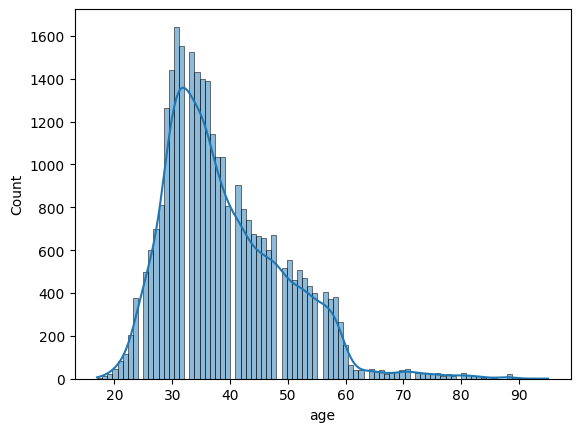

In [ ]:
sns.histplot(data=df1, x="age",kde=True)

<Axes: xlabel='duration', ylabel='Count'>

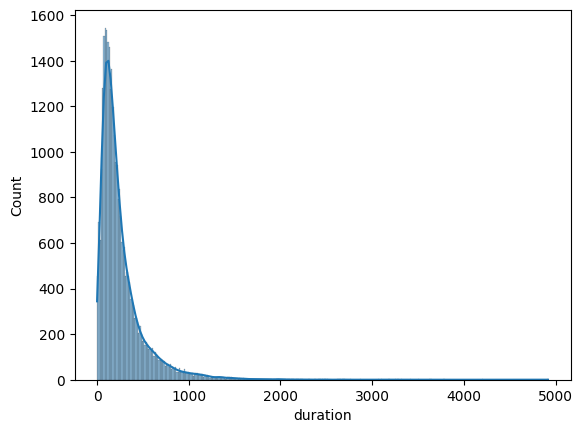

In [ ]:
sns.histplot(data=df1, x="duration",kde=True)

<Axes: xlabel='campaign', ylabel='Count'>

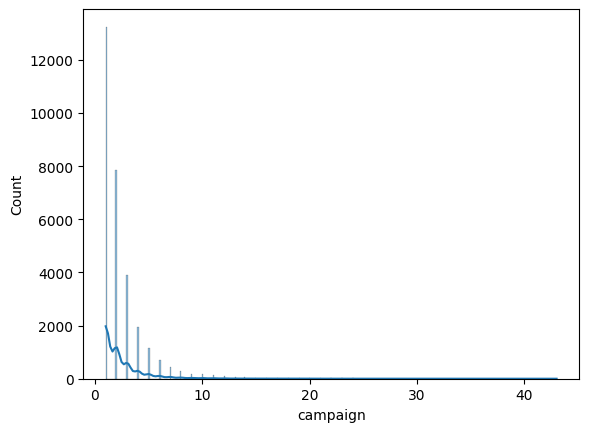

In [ ]:
sns.histplot(data=df1, x="campaign",kde=True)

<Axes: xlabel='pdays', ylabel='Count'>

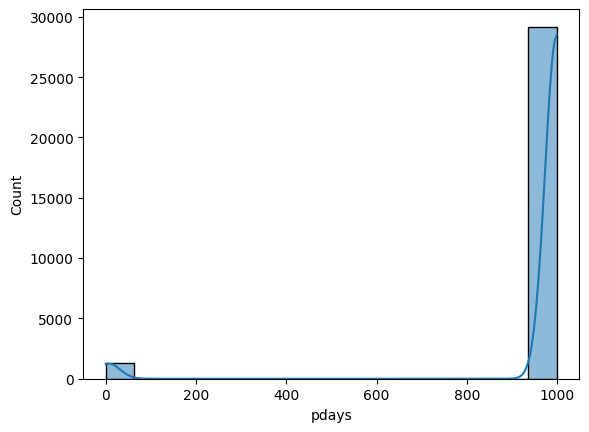

In [ ]:
sns.histplot(data=df1, x="pdays",kde=True)

<Axes: xlabel='previous', ylabel='Count'>

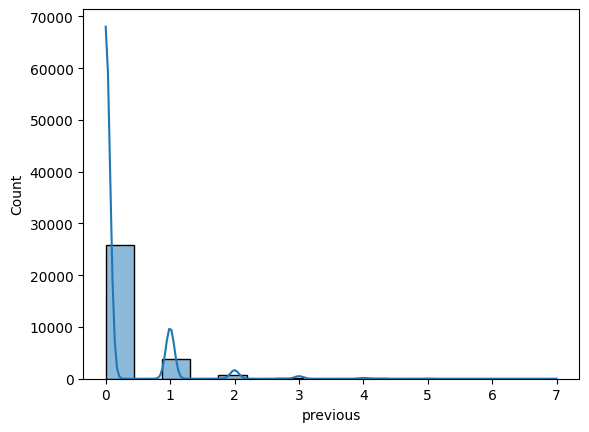

In [ ]:
sns.histplot(data=df1, x="previous",kde=True)

<Axes: xlabel='emp_var_rate', ylabel='Count'>

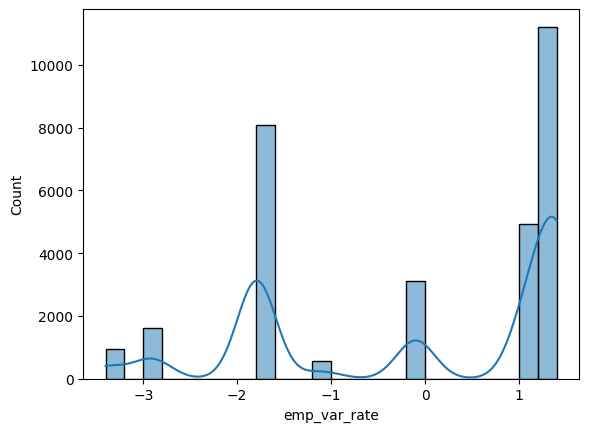

In [ ]:
sns.histplot(data=df1, x="emp_var_rate",kde=True)

<Axes: xlabel='cons_price_idx', ylabel='Count'>

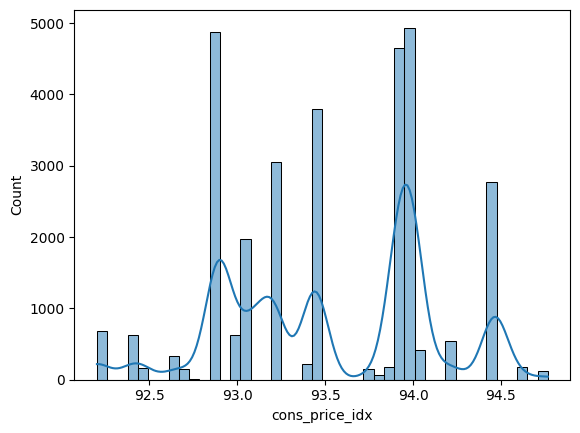

In [ ]:
sns.histplot(data=df1, x="cons_price_idx",kde=True)

<Axes: xlabel='cons_conf_idx', ylabel='Count'>

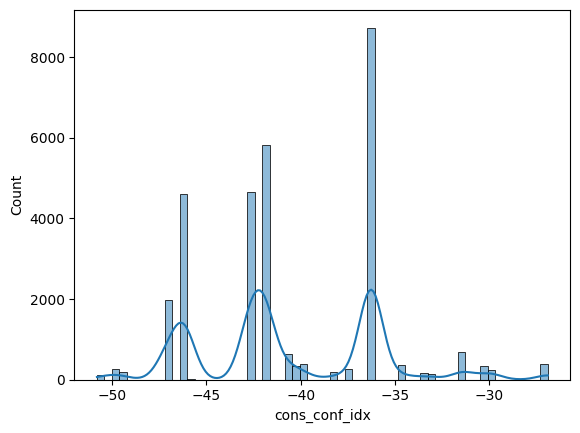

In [ ]:
sns.histplot(data=df1, x="cons_conf_idx",kde=True)

<Axes: xlabel='euribor3m', ylabel='Count'>

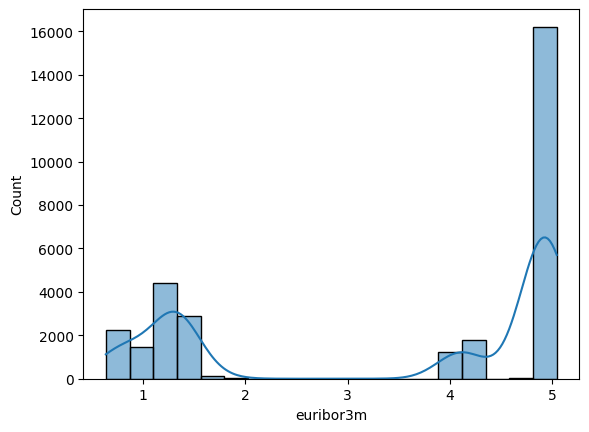

In [ ]:
sns.histplot(data=df1, x="euribor3m",kde=True)

<Axes: xlabel='nr_employed', ylabel='Count'>

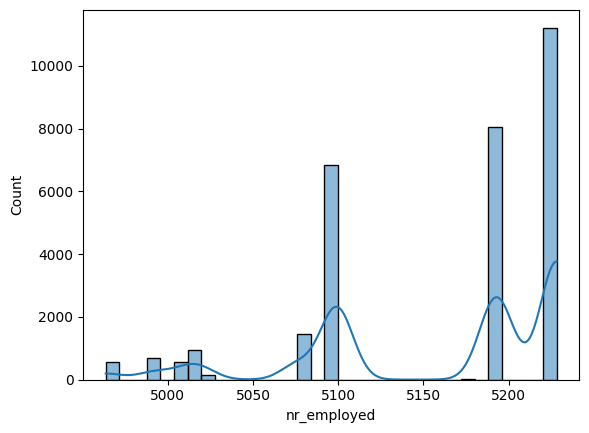

In [ ]:
sns.histplot(data=df1, x="nr_employed",kde=True)

<Axes: xlabel='job', ylabel='count'>

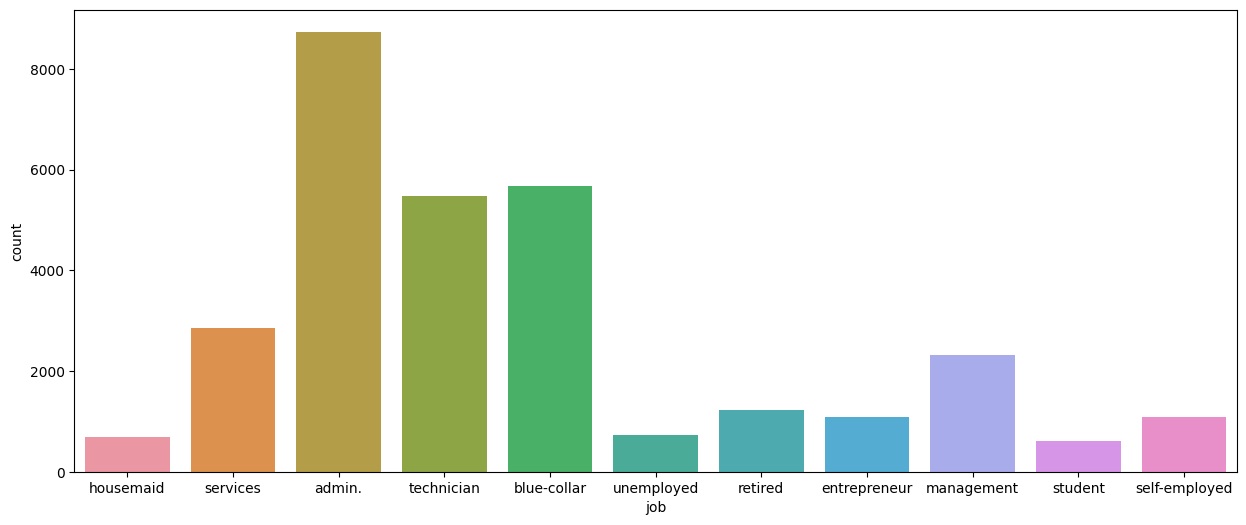

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df1,x='job')

<Axes: xlabel='marital', ylabel='count'>

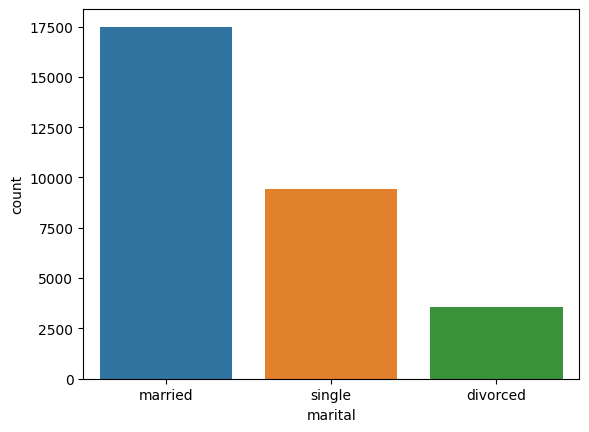

In [ ]:
sns.countplot(data=df1,x='marital')

<Axes: xlabel='education', ylabel='count'>

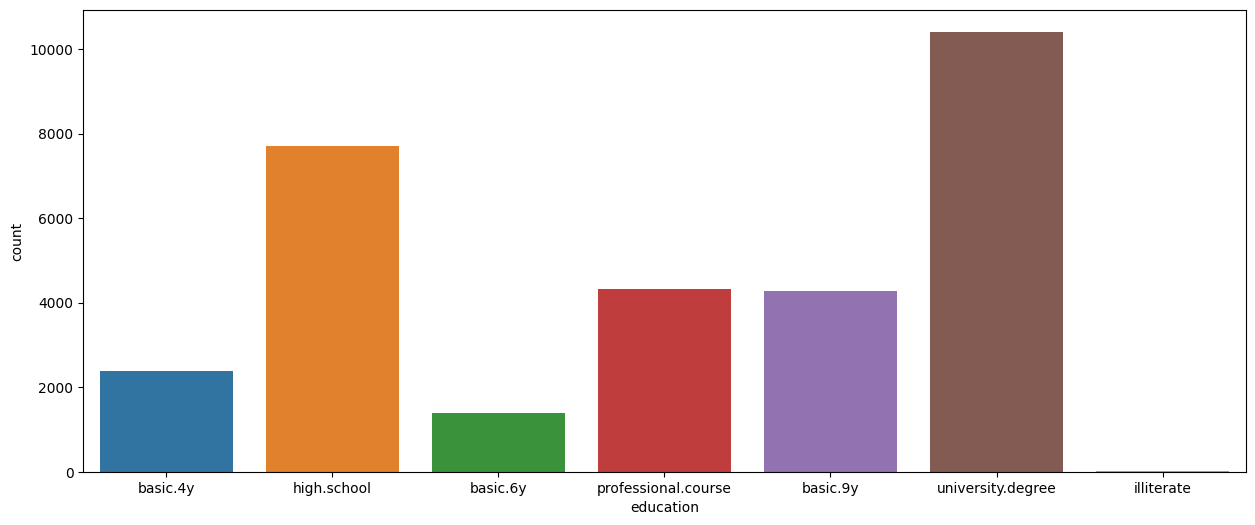

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df1,x='education')

<Axes: xlabel='default', ylabel='count'>

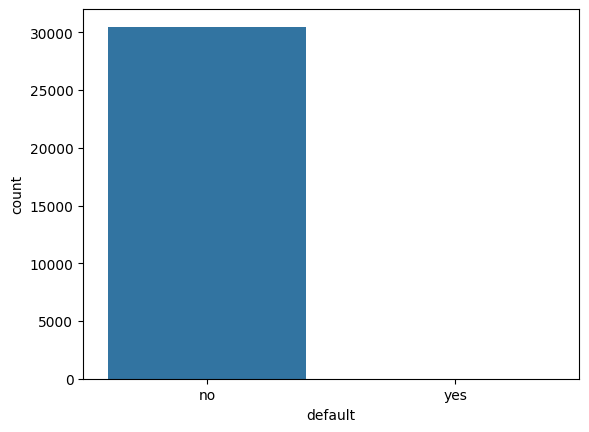

In [ ]:
sns.countplot(data=df1,x='default')

<Axes: xlabel='contact', ylabel='count'>

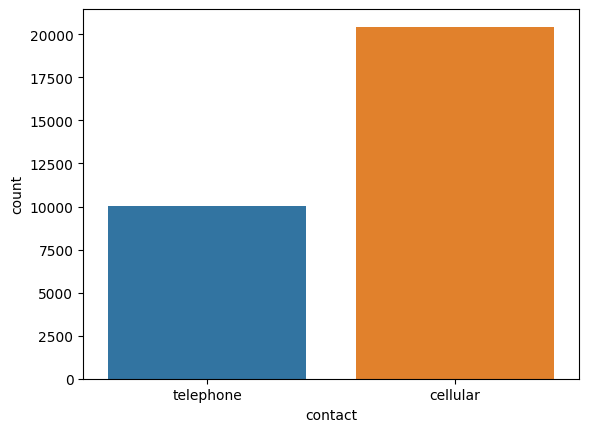

In [ ]:
sns.countplot(data=df1,x='contact')

<Axes: xlabel='housing', ylabel='count'>

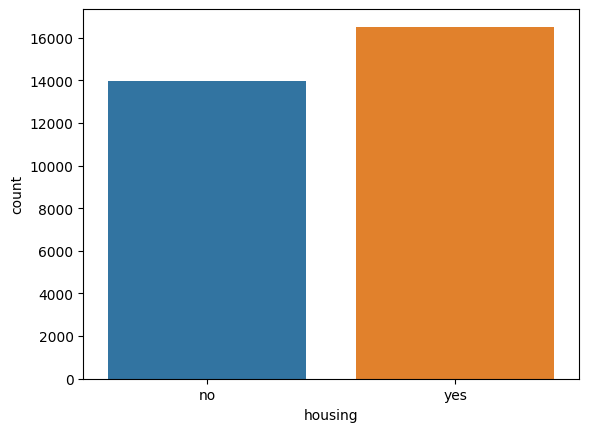

In [ ]:
sns.countplot(data=df1,x='housing')

<Axes: xlabel='loan', ylabel='count'>

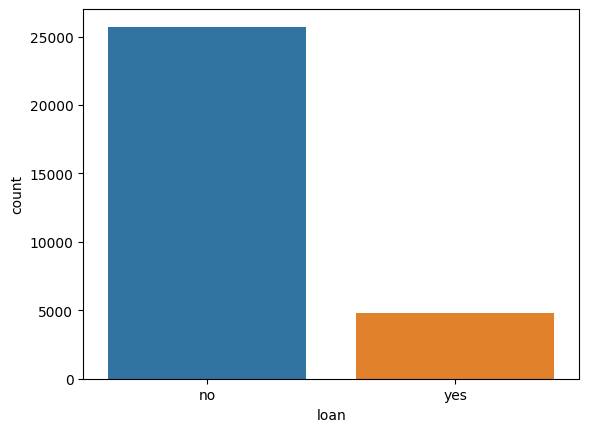

In [ ]:
sns.countplot(data=df1,x='loan')

<Axes: xlabel='month', ylabel='count'>

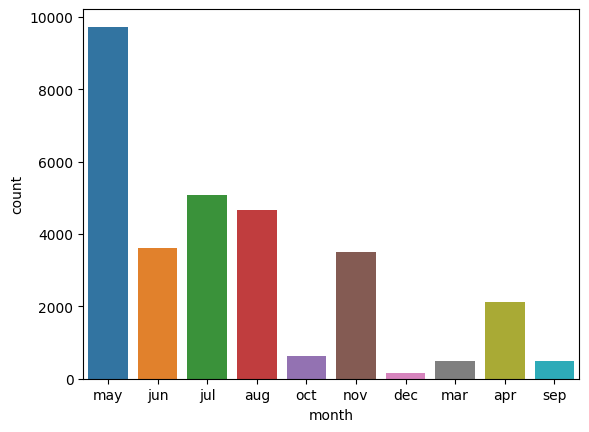

In [ ]:
sns.countplot(data=df1,x='month')

<Axes: xlabel='day_of_week', ylabel='count'>

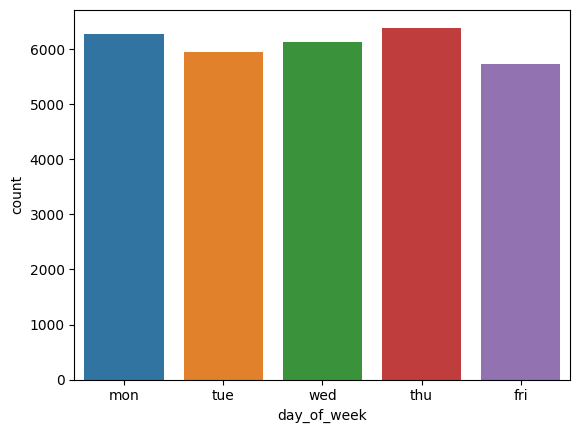

In [ ]:
sns.countplot(data=df1,x='day_of_week')

<Axes: xlabel='poutcome', ylabel='count'>

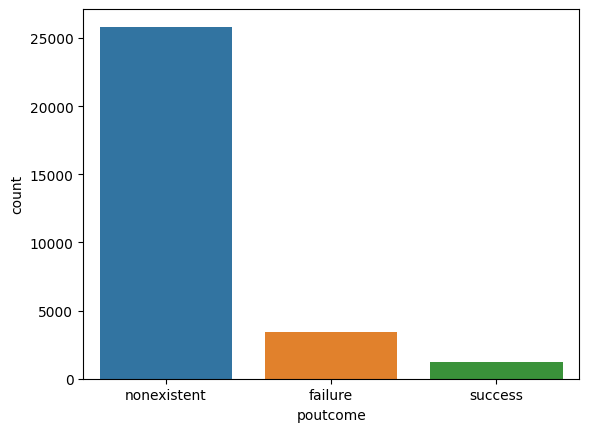

In [ ]:
sns.countplot(data=df1,x='poutcome')

OUTLIER REMOVING

Only for the age , cons_conf_idx column because they have a very small proportion of the dataset and droping the default column due to its imbalanced nature.


In [ ]:
df1.drop(df1[(df1['age'] < (Q1.age - 1.5 * IQR.age)) |(df1['age'] > (Q3.age + 1.5 * IQR.age))].index,inplace=True)
df1.drop(df1[(df1['cons_conf_idx'] < (Q1.cons_conf_idx - 1.5 * IQR.cons_conf_idx)) |(df1['cons_conf_idx'] > (Q3.cons_conf_idx + 1.5 * IQR.cons_conf_idx))].index,inplace=True)
df1=df1.drop('default',axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29691 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29691 non-null  int64  
 1   job             29691 non-null  object 
 2   marital         29691 non-null  object 
 3   education       29691 non-null  object 
 4   housing         29691 non-null  object 
 5   loan            29691 non-null  object 
 6   contact         29691 non-null  object 
 7   month           29691 non-null  object 
 8   day_of_week     29691 non-null  object 
 9   duration        29691 non-null  int64  
 10  campaign        29691 non-null  int64  
 11  pdays           29691 non-null  int64  
 12  previous        29691 non-null  int64  
 13  poutcome        29691 non-null  object 
 14  emp_var_rate    29691 non-null  float64
 15  cons_price_idx  29691 non-null  float64
 16  cons_conf_idx   29691 non-null  float64
 17  euribor3m       29691 non-null 

# DATA PREPROCESSING

In [ ]:
# Encoding the Categorical Values

label_encoder = LabelEncoder()
df1['marital'] = label_encoder.fit_transform(df1['marital'])
df1['education'] = label_encoder.fit_transform(df1['education'])
df1['contact'] = label_encoder.fit_transform(df1['contact'])
df1['housing'] = label_encoder.fit_transform(df1['housing'])
df1['loan'] = label_encoder.fit_transform(df1['loan'])
df1['day_of_week'] = label_encoder.fit_transform(df1['day_of_week'])
df1['month'] = label_encoder.fit_transform(df1['month'])
df1['job'] = label_encoder.fit_transform(df1['job'])
df1['poutcome'] = label_encoder.fit_transform(df1['poutcome'])
df1['y'] = label_encoder.fit_transform(df1['y'])


In [ ]:
df1.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,1,6,1,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#  Exploratory Data Analysis (EDA)

<Axes: xlabel='age', ylabel='Count'>

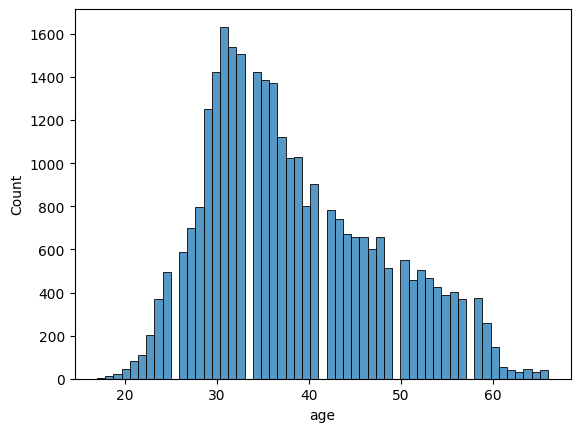

In [ ]:
# Distribution Plot of Age
sns.histplot(df1['age'])

In [ ]:
#Correlation of all features with Subscription
df1.corr()['y'][:-1]

age              -0.003803
job               0.014110
marital           0.048599
education         0.058077
housing           0.011219
loan             -0.003005
contact          -0.137026
month            -0.021121
day_of_week       0.020395
duration          0.405113
campaign         -0.063838
pdays            -0.321491
previous          0.220896
poutcome          0.140126
emp_var_rate     -0.288201
cons_price_idx   -0.112447
cons_conf_idx     0.024003
euribor3m        -0.299976
nr_employed      -0.348121
Name: y, dtype: float64

<Axes: >

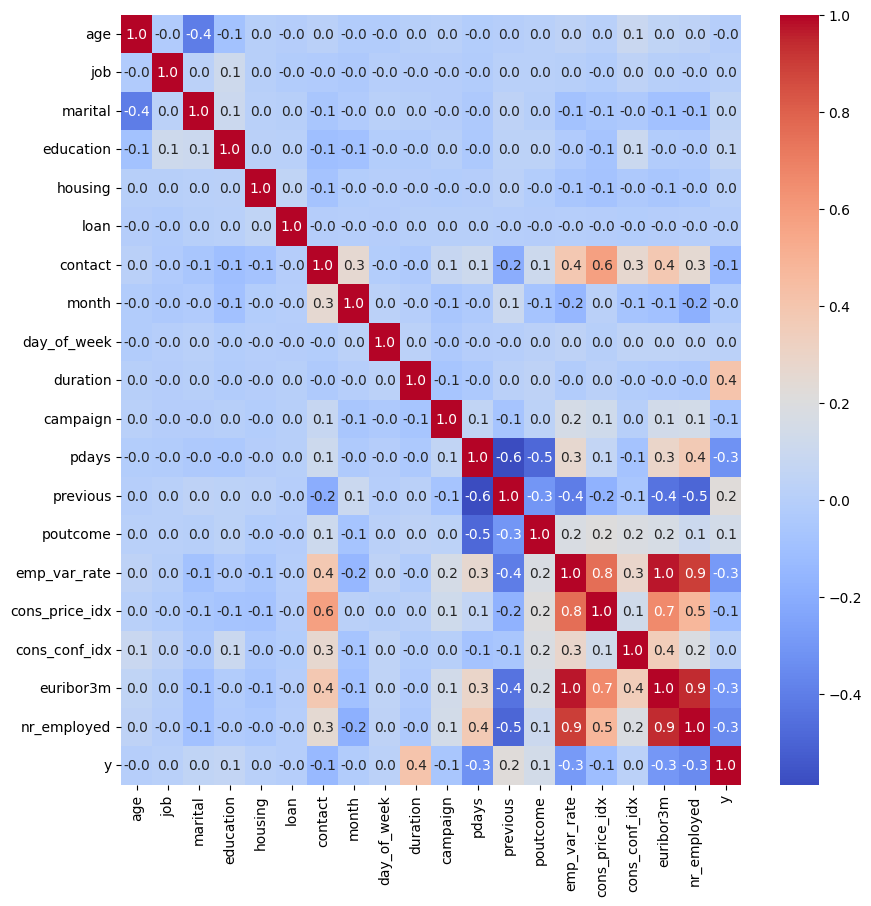

In [ ]:
# Plotting the heat map for Correlation matrix

plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm',fmt="0.1f")

# Machine Learning Algoirithms


*   Logistic Regression

*    Decision Tree

*    Random Forest




Splitting Data

In [ ]:
#Split the Data for Training and Testing

X = df1.drop('y', axis=1)
y = df1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)

Size of X_train: (20783, 19)
Size of X_test: (8908, 19)


Logistic Regression Model

In [ ]:
# Import Loistic Regression

logreg = LogisticRegression()


In [ ]:
#Training the model
logreg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Check accuracy , recall , precision score, f-1 score

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(" F1 Score (Logistic Regression) :- ", f1)
print(" Accuracy Score (Logistic Regression) :- ",accuracy)
print(" Recall Score (Logistic Regression) :- ",recall)
print(" Precision Score (Logistic Regression) :- ",precision)

 F1 Score (Logistic Regression) :-  0.47167487684729065
 Accuracy Score (Logistic Regression) :-  0.9036820835204311
 Recall Score (Logistic Regression) :-  0.3780848963474827
 Precision Score (Logistic Regression) :-  0.6268412438625205


In [ ]:
# Calculating weights of each feature
weights = logreg.coef_[0] * (X.max(axis=0) - X.min(axis=0)) / X.std(axis=0)


In [ ]:
# Arrange weights in descending order magnitude wise
sorted_weights = sorted(zip(X.columns, weights), key=lambda x: abs(x[1]), reverse=True)
# Print the sorted weights only two decimals
for feature, weight in sorted_weights:
  print(f"{feature}: {weight:.4f}")
  print(20*"-----")



campaign: -1.1441
----------------------------------------------------------------------------------------------------
cons_price_idx: 0.9522
----------------------------------------------------------------------------------------------------
emp_var_rate: -0.8208
----------------------------------------------------------------------------------------------------
euribor3m: -0.7188
----------------------------------------------------------------------------------------------------
education: 0.3178
----------------------------------------------------------------------------------------------------
month: -0.2015
----------------------------------------------------------------------------------------------------
cons_conf_idx: 0.1967
----------------------------------------------------------------------------------------------------
previous: 0.1804
----------------------------------------------------------------------------------------------------
duration: 0.0858
---------------------

Decision Tree Model

In [ ]:
# Import Decision Tree Classifier

dtc = DecisionTreeClassifier()

#Training the Model

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Check accuracy, recall, precision score

y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
print("Accuracy Score (Decision Tree Classifier) : -", accuracy_dtc)
print("Recall Score (Decision Tree Classifier) : -", recall_dtc)
print("Precision Score (Decision Tree Classifier) : -", precision_dtc)

Accuracy Score (Decision Tree Classifier) : - 0.8860574764256848
Recall Score (Decision Tree Classifier) : - 0.5567620927936822
Precision Score (Decision Tree Classifier) : - 0.49911504424778763


Random forest

In [ ]:
# Import Random Tree Classifier

rfc = RandomForestClassifier()

#Training the Model

rfc.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Check accuracy, recall, precision score

y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
print("Accuracy Score (Random Forest Classifier) : -", accuracy_rfc)
print("Recall Score (Random Forest Classifier) : -", recall_rfc)
print("Precision Score (Random Forest Classifier) : -", precision_rfc)

Accuracy Score (Random Forest Classifier) : - 0.9126627750336775
Recall Score (Random Forest Classifier) : - 0.5192497532082923
Precision Score (Random Forest Classifier) : - 0.6438188494492044


**CONCLUSION**
---
---




*   The dataset belongs to a particular location and type of people  of that
    area and thier response to the bank .
*   It has a lot of missing Values and outliers so need to be processed accurately .

*   It can be used to study finance of people of Portuguese and help the bank to improve its communication with customers and also increase its worth by predicting which customers would be more likely to take subscription and benefit hte bank.



